<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista2_Simula%C3%A7%C3%A3oEstoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1ª Questão Letra A:

In [1]:
%pip install simpy

In [2]:
import numpy as np
import simpy

In [6]:

class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def media_fila(self, lista):
      return sum(lista)/len(lista)

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Tamanho Médio da fila = {self.media_fila(self.vetor_n)}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, Tamanho da fila = {self.tamanho_da_fila}, Tamanho Médio da fila = {self.media_fila(self.vetor_n)}")



def gera_chegadas(env, fila_mm1):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.5858652606448723, tamanho da fila = 1, Tamanho Médio da fila = 1.0
Cliente 1 saiu em 0.9136157851448423, Tamanho da fila = 0, Tamanho Médio da fila = 0.5
Cliente 2 chegou à fila em 1.446005457150439, tamanho da fila = 1, Tamanho Médio da fila = 0.6666666666666666
Cliente 2 saiu em 1.817522036402992, Tamanho da fila = 0, Tamanho Médio da fila = 0.5
Cliente 3 chegou à fila em 1.8582473706101608, tamanho da fila = 1, Tamanho Médio da fila = 0.6
Cliente 4 chegou à fila em 1.9376266062029142, tamanho da fila = 2, Tamanho Médio da fila = 0.8333333333333334
Cliente 3 saiu em 2.0009864334370873, Tamanho da fila = 1, Tamanho Médio da fila = 0.8571428571428571
Cliente 5 chegou à fila em 2.0087672376159214, tamanho da fila = 2, Tamanho Médio da fila = 1.0
Cliente 4 saiu em 2.391556761249416, Tamanho da fila = 1, Tamanho Médio da fila = 1.0
Cliente 5 saiu em 2.511727403289076, Tamanho da fila = 0, Tamanho Médio da fila = 0.9
Cliente 6 chegou à fila em 3.056261246863066

#1ª Questão Letra B:

In [15]:
import simpy
import random
global i
i = 0
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []
        self.erro = 1

    def media_fila(self, lista):
      return sum(lista)/len(lista)

    def chegada_cliente(self, cliente):
        global i
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila},erro = {self.erro}, iteração = {i}")
        tam_medio_inicial = self.media_fila(self.vetor_n)
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            i = i + 1
            tam_medio_final = self.media_fila(self.vetor_n)
            self.erro = abs(tam_medio_final - tam_medio_inicial)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, erro = {self.erro},iteração = {i}")


def tam_media(vetor):
  if len(vetor) == 0: return 0
  return sum(vetor)/len(vetor)

def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        if (fila_mm1.erro <= 0.0004): break # Critério de convergência
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=100)


Cliente 1 chegou à fila em 0.31210286455470687, tamanho da fila = 1,erro = 1, iteração = 1
Cliente 1 saiu em 0.34056770036076806, tamanho da fila = 0, erro = 0.5,iteração = 2
Cliente 2 chegou à fila em 0.9338451596965687, tamanho da fila = 1,erro = 0.5, iteração = 3
Cliente 2 saiu em 1.03018727306722, tamanho da fila = 0, erro = 0.16666666666666663,iteração = 4
Cliente 3 chegou à fila em 1.6378479228432687, tamanho da fila = 1,erro = 0.16666666666666663, iteração = 5
Cliente 4 chegou à fila em 1.7826899804922363, tamanho da fila = 2,erro = 0.16666666666666663, iteração = 6
Cliente 5 chegou à fila em 1.9413699708001069, tamanho da fila = 3,erro = 0.16666666666666663, iteração = 7
Cliente 6 chegou à fila em 2.2432269241995275, tamanho da fila = 4,erro = 0.16666666666666663, iteração = 8
Cliente 7 chegou à fila em 2.368502268792591, tamanho da fila = 5,erro = 0.16666666666666663, iteração = 9
Cliente 8 chegou à fila em 2.4254437098907147, tamanho da fila = 6,erro = 0.16666666666666663, it

#2ª Questão Letra A:

In [ ]:

class FilaMMC:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMC(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)
vetor_n = fila.vetor_n
vetor_a = fila.vetor_a

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.028155021857796374, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.12289469877319041, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.18296081912142945, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 0.33623533383743026, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 0.5400957936820677, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 saiu em 0.6673370342671395, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 1.6616445643160287, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 1.9621206488144476, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 2.352890679753016, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 saiu em 2.403230575689898, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 2.5820753452312117, tamanho da fila = 1, Pessoas em atendimento =

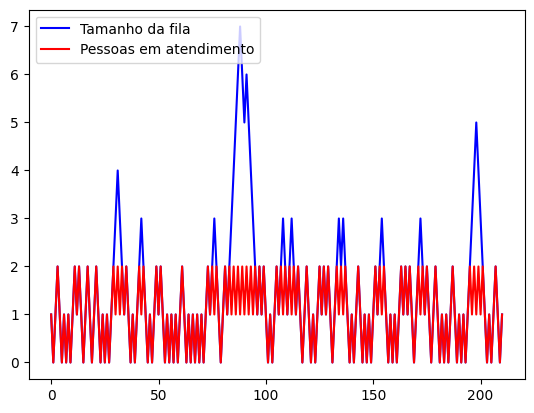

In [ ]:
# Plot do tamanho da fila e a quantidade de pessoas em atendimento
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(vetor_n))]
aux.plot(eixo_x, vetor_n, color = 'blue', label = 'Tamanho da fila')
aux.legend(loc='upper left')
aux.plot(eixo_x, vetor_a, color = 'red', label = 'Pessoas em atendimento')
aux.legend(loc='upper left')
plt.show()

# 2ª Questão Letra B:

In [ ]:
vetor = []

In [ ]:

class FilaMMCB:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.taxa_de_uti = 0
        self.tempo_total_do_sistema = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        self.tempo_total_do_sistema.append(self.env.now)
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            tempo_inicial = self.env.now
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            tempo_final = self.env.now
            self.taxa_de_uti = self.taxa_de_uti + (tempo_final - tempo_inicial)
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}, tempo de atendimento = {tempo_final - tempo_inicial}")
            self.tempo_total_do_sistema.append(self.env.now)

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')

Cliente 1 chegou à fila em 0.5711251283658114, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.609909856949342, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.03878472858353055
Cliente 2 chegou à fila em 2.067294608086974, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 saiu em 2.285566998067066, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.21827238998009202
Cliente 3 chegou à fila em 2.4925394368494724, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 saiu em 2.7903693786032253, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.2978299417537529
Cliente 4 chegou à fila em 4.331100817510844, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 4.711346549907671, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 4 saiu em 5.08465844373325, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.7535576262224062
Cliente 6 cheg

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 1**

In [ ]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=1, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.06430635119636993, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.07624633826838575, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.08264619544511102, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 4 chegou à fila em 0.09518462565859429, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.1233998473169978, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 1 saiu em 0.45858305533582744, tamanho da fila = 4, Pessoas em atendimento = 1, tempo de atendimento = 0.3942767041394575
Cliente 6 chegou à fila em 0.6091515134645076, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 0.9340141268482527, tamanho da fila = 6, Pessoas em atendimento = 2
Cliente 8 chegou à fila em 1.0101921241776282, tamanho da fila = 7, Pessoas em atendimento = 2
Cliente 9 chegou à fila em 1.151090502598777, tamanho da fila = 8, Pessoas em atendimento = 2
Cliente 10 c

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 2**

In [ ]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=2, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.02120346609332216, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.17922279664500337, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.46186155316739397, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 2 saiu em 0.53129206837832, tamanho da fila = 2, Pessoas em atendimento = 1, tempo de atendimento = 0.3520692717333166
Cliente 1 saiu em 0.6392367152312246, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.6180332491379025
Cliente 4 chegou à fila em 0.8074740577042477, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 chegou à fila em 1.1407335483642673, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 6 chegou à fila em 1.2437904523447734, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 1.3535287937682585, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 3 saiu em 1.3686229067222344, tamanho da fila = 4, Pessoas em atendi

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 3**

In [ ]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.05152966986540889, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.11080982105670201, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.059280151191293116
Cliente 2 chegou à fila em 0.3495730991547073, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 0.43871845046938873, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 4 chegou à fila em 0.5724968139864969, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.5906776604731595, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 3 saiu em 0.5982460611970444, tamanho da fila = 3, Pessoas em atendimento = 1, tempo de atendimento = 0.15952761072765564
Cliente 6 chegou à fila em 0.6020574288604889, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 4 saiu em 0.6927058425390648, tamanho da fila = 3, Pessoas em atendimento = 1, tempo de atendimento = 0.09445978134202038
Cliente 7 chegou à fila em 0.7285671

**Comparação**

In [ ]:
print(f'Em todos os casos analisados definimos o número de atendentes = 2')
print(f'taxa de utilização = {vetor[0]}% para taxa de chegada = 5 e taxa de atendimento = 1')
print(f'taxa de utilização = {vetor[1]}% para taxa de chegada = 5 e taxa de atendimento = 2')
print(f'taxa de utilização = {vetor[2]}% para taxa de chegada = 5 e taxa de atendimento = 3')

Em todos os casos analisados definimos o número de atendentes = 2
taxa de utilização = 98.91835571103127% para taxa de chegada = 5 e taxa de atendimento = 1
taxa de utilização = 96.86933708088009% para taxa de chegada = 5 e taxa de atendimento = 2
taxa de utilização = 85.4852495801714% para taxa de chegada = 5 e taxa de atendimento = 3


#3ª Questão

In [ ]:
# Fila implementada para termos dois tipos de clientes(normal e prioritário)
class FilaMM1:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0

    def chegada_cliente(self, cliente, prio, tipo_cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        if tipo_cliente == 'P':
          print(f"Cliente {cliente}(Prioritário) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        else:
          print(f"Cliente {cliente}(Normal) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")


def gera_chegadas(env, fila_mm1):
    cliente = 0
    prio = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        tipo_cliente = np.random.choice(['N', 'P']) # Define se o cliente é normal ou prioritário
        if tipo_cliente == 'P':
            prio = prio + 1
            env.process(fila_mm1.chegada_cliente(cliente, prio, tipo_cliente))
        else:
            env.process(fila_mm1.chegada_cliente(cliente, 1000000000000, tipo_cliente))


env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)
fila = FilaMM1(env, res, taxa_chegada=5, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1(Normal) chegou à fila em 0.11999438466194667, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2(Normal) chegou à fila em 0.17562088605271192, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 1 saiu em 0.3373133581821034, tamanho da fila = 1
Cliente 2 saiu em 0.4419425519880318, tamanho da fila = 0
Cliente 3(Normal) chegou à fila em 0.5049773258940653, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4(Prioritário) chegou à fila em 0.5322163375590966, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 saiu em 0.5521038331313612, tamanho da fila = 1
Cliente 4 saiu em 0.5576116111233979, tamanho da fila = 0
Cliente 5(Normal) chegou à fila em 0.7171862671701583, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 saiu em 0.8201487012363572, tamanho da fila = 0
Cliente 6(Normal) chegou à fila em 1.179788169700034, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 6 saiu em 1.335312418228817, tamanho da fila = 0
Cliente 7(Normal) chegou à fi

#4ª Questão Letra A:

In [ ]:
# Sistema implemntado para temos um limite de 10 pessoas.
class FilaMM1K:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")


def gera_chegadas(env, fila_mm1k, limite_sistema):
    cliente = 0
    limite = limite_sistema
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1k.taxa_chegada))
        cliente += 1
        if (fila_mm1k.tamanho_da_fila + fila.qtd_atendimento) >= limite_sistema: # Quantidade de pessoas que estão na fila mais a quantidade de pessoas que estão em atendimento
          print(f'O sistema está lotado e o cliente {cliente} foi rejeitado')
        else:
          env.process(fila_mm1k.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1K(env, res, taxa_chegada=3, taxa_servico=3)
limite_sistema = 10 # Variável que define a quantidade máxima de pessoas que podem está no nosso sistema
env.process(gera_chegadas(env, fila, limite_sistema))

env.run(until=100)


Cliente 1 chegou à fila em 0.6839664983846788, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.928839748195558, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 1.1067758033910304, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 4 chegou à fila em 1.1993595410380955, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 1 saiu em 1.2527152015825154, tamanho da fila = 3, Pessoas em atendimento = 0
Cliente 2 saiu em 1.4424014115489936, tamanho da fila = 2, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 1.4542440961594763, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 3 saiu em 1.777562291087167, tamanho da fila = 2, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 1.9468754436476567, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 7 chegou à fila em 2.2500053503330175, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 8 chegou à fila em 2.550736079252169, tamanho da fila = 5, Pessoas em a

# 5ª Questão

In [ ]:
# Fila MMC modificada para atender um cliente aleatório que está fila
class FilaMMCA:
    def __init__(self, env, res, c, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.PriorityResource(env, capacity=c)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente, prio):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmca):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmca.taxa_chegada))
        cliente += 1
        prio = random.randint(0, 1000000000000000000000) # Definimos a prioridade de um cliente com um número inteiro aleatório
        env.process(fila_mmca.chegada_cliente(cliente, prio))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=c)
fila = FilaMMCA(env, res, c, taxa_chegada=2, taxa_servico=3)


env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.063960714860393, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.2923337860042755, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 0.38164669095023773, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.4087188558570758, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 1 saiu em 0.521432151728195, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 4 chegou à fila em 0.6303785560117003, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 chegou à fila em 0.71525859579405, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 4 saiu em 1.0174299712933674, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 1.3558812865180507, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 saiu em 1.3888973454078775, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 2.4780812733064526, tamanho da fila = 1, Pessoas em atendimento = 0
Cli